In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 5 # number of steps to apply to the discriminator
j = 5 # number of steps to apply to the generator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

��Ŀ¼���ļ� -p �Ѿ����ڡ�
����: -p ʱ������
��Ŀ¼���ļ� input �Ѿ����ڡ�
����: input ʱ������
��Ŀ¼���ļ� -p �Ѿ����ڡ�
����: -p ʱ������
��Ŀ¼���ļ� outputs �Ѿ����ڡ�
����: outputs ʱ������


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    v = torch.randn(sample_size, nz).to(device)
    return v

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:20,  5.69it/s]                         


Epoch 1 of 100
Generator loss: 0.39870831, Discriminator loss: 1.19350028


118it [00:18,  6.31it/s]                         


Epoch 2 of 100
Generator loss: 0.44605830, Discriminator loss: 0.37926686


118it [00:18,  6.43it/s]                         


Epoch 3 of 100
Generator loss: 1.05685043, Discriminator loss: 0.53538752


118it [00:18,  6.52it/s]                         


Epoch 4 of 100
Generator loss: 1.74734187, Discriminator loss: 0.46955422


118it [00:18,  6.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


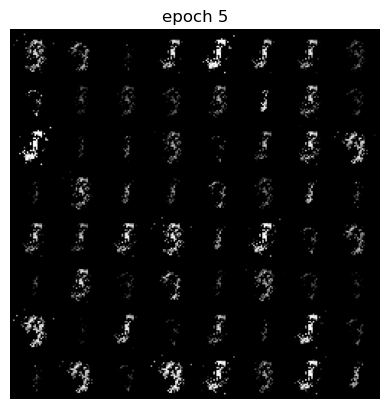

Epoch 5 of 100
Generator loss: 1.39782476, Discriminator loss: 0.51566893


118it [00:18,  6.32it/s]                         


Epoch 6 of 100
Generator loss: 1.74094427, Discriminator loss: 0.48708755


118it [00:12,  9.69it/s]                         


Epoch 7 of 100
Generator loss: 2.11485910, Discriminator loss: 0.43965712


118it [00:09, 12.48it/s]                         


Epoch 8 of 100
Generator loss: 1.55400562, Discriminator loss: 0.55199468


118it [00:09, 12.52it/s]                         


Epoch 9 of 100
Generator loss: 1.42632937, Discriminator loss: 0.55663633


118it [00:09, 12.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


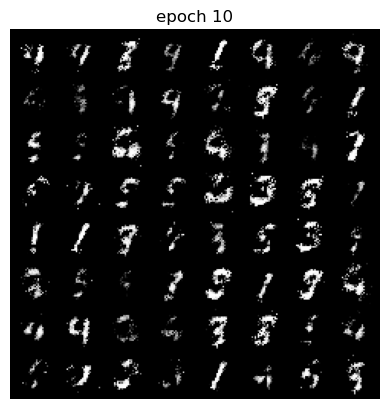

Epoch 10 of 100
Generator loss: 1.92508459, Discriminator loss: 0.47203928


118it [00:11, 10.09it/s]                         


Epoch 11 of 100
Generator loss: 1.81076860, Discriminator loss: 0.55963403


118it [00:15,  7.80it/s]                         


Epoch 12 of 100
Generator loss: 2.29841137, Discriminator loss: 0.56498653


118it [00:15,  7.69it/s]                         


Epoch 13 of 100
Generator loss: 1.53262687, Discriminator loss: 0.98817831


118it [00:13,  8.62it/s]                         


Epoch 14 of 100
Generator loss: 1.42942381, Discriminator loss: 0.66461122


118it [00:17,  6.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


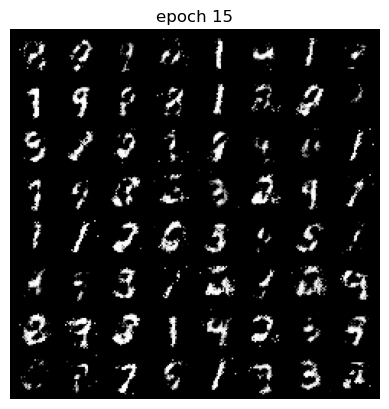

Epoch 15 of 100
Generator loss: 1.54736030, Discriminator loss: 0.64945114


118it [00:18,  6.48it/s]                         


Epoch 16 of 100
Generator loss: 1.22887540, Discriminator loss: 0.50760925


118it [00:15,  7.63it/s]                         


Epoch 17 of 100
Generator loss: 1.69260454, Discriminator loss: 0.60122287


118it [00:18,  6.46it/s]                         


Epoch 18 of 100
Generator loss: 1.76400447, Discriminator loss: 0.54872680


118it [00:18,  6.54it/s]                         


Epoch 19 of 100
Generator loss: 1.19136810, Discriminator loss: 0.84900433


118it [00:18,  6.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


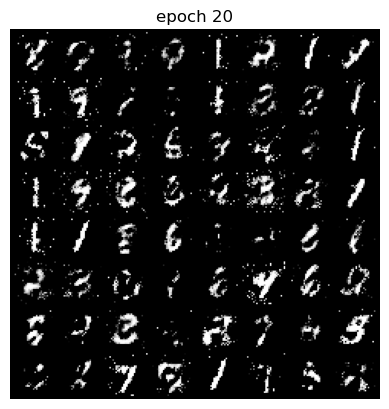

Epoch 20 of 100
Generator loss: 1.48357677, Discriminator loss: 0.77539098


118it [00:18,  6.47it/s]                         


Epoch 21 of 100
Generator loss: 1.97163463, Discriminator loss: 0.61574906


118it [00:18,  6.43it/s]                         


Epoch 22 of 100
Generator loss: 1.62683797, Discriminator loss: 0.82506394


118it [00:18,  6.55it/s]                         


Epoch 23 of 100
Generator loss: 1.42794311, Discriminator loss: 0.97544152


118it [00:18,  6.49it/s]                         


Epoch 24 of 100
Generator loss: 1.68662071, Discriminator loss: 0.88475561


118it [00:18,  6.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


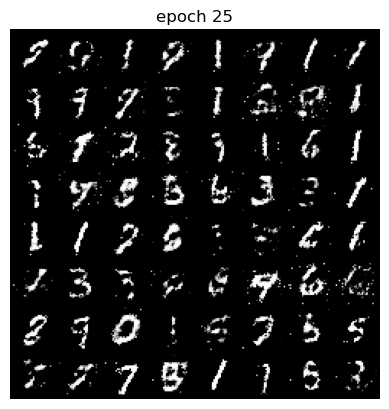

Epoch 25 of 100
Generator loss: 1.32585239, Discriminator loss: 0.82089603


118it [00:18,  6.46it/s]                         


Epoch 26 of 100
Generator loss: 1.44674659, Discriminator loss: 0.70745361


118it [00:17,  6.78it/s]                         


Epoch 27 of 100
Generator loss: 1.39768791, Discriminator loss: 0.91715729


118it [00:17,  6.85it/s]                         


Epoch 28 of 100
Generator loss: 1.57029080, Discriminator loss: 0.72066033


118it [00:13,  8.81it/s]                         


Epoch 29 of 100
Generator loss: 1.33568048, Discriminator loss: 0.84079111


118it [00:13,  8.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


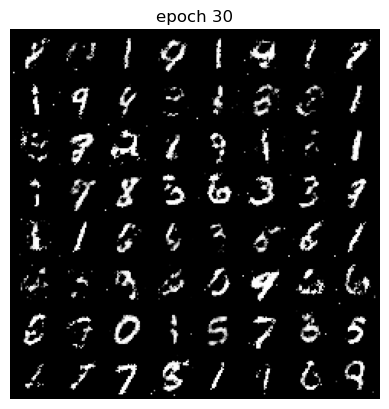

Epoch 30 of 100
Generator loss: 1.15725577, Discriminator loss: 1.08178508


118it [00:14,  8.33it/s]                         


Epoch 31 of 100
Generator loss: 1.51752019, Discriminator loss: 0.92483580


118it [00:14,  8.19it/s]                         


Epoch 32 of 100
Generator loss: 1.32487977, Discriminator loss: 0.81688786


118it [00:14,  8.02it/s]                         


Epoch 33 of 100
Generator loss: 1.26656246, Discriminator loss: 0.86767250


118it [00:14,  8.03it/s]                         


Epoch 34 of 100
Generator loss: 1.72255504, Discriminator loss: 0.89036894


118it [00:14,  7.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


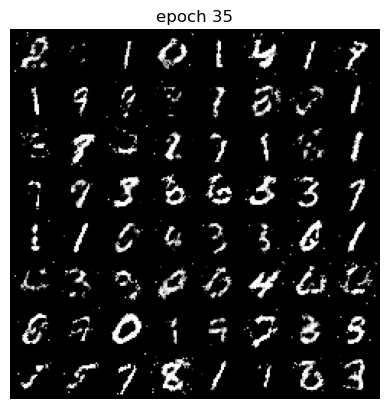

Epoch 35 of 100
Generator loss: 1.24682796, Discriminator loss: 0.94890368


118it [00:14,  8.10it/s]                         


Epoch 36 of 100
Generator loss: 1.11048102, Discriminator loss: 1.18651474


118it [00:14,  8.15it/s]                         


Epoch 37 of 100
Generator loss: 1.15297747, Discriminator loss: 0.91843802


118it [00:14,  8.28it/s]                         


Epoch 38 of 100
Generator loss: 1.21453726, Discriminator loss: 1.02798033


118it [00:14,  8.03it/s]                         


Epoch 39 of 100
Generator loss: 1.18106413, Discriminator loss: 1.00072014


118it [00:14,  8.26it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


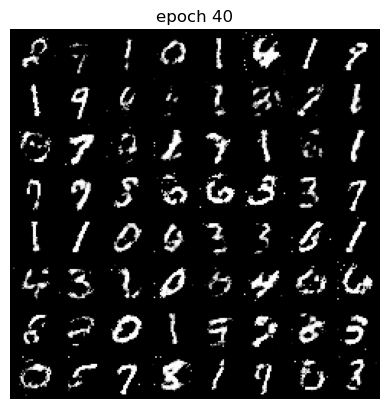

Epoch 40 of 100
Generator loss: 1.15555310, Discriminator loss: 0.90285629


118it [00:14,  8.22it/s]                         


Epoch 41 of 100
Generator loss: 1.01863790, Discriminator loss: 1.05596519


118it [00:14,  8.29it/s]                         


Epoch 42 of 100
Generator loss: 1.36041927, Discriminator loss: 0.83315963


118it [00:14,  8.31it/s]                         


Epoch 43 of 100
Generator loss: 1.11789346, Discriminator loss: 1.05099189


118it [00:14,  8.17it/s]                         


Epoch 44 of 100
Generator loss: 1.16244066, Discriminator loss: 0.95555913


118it [00:14,  8.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


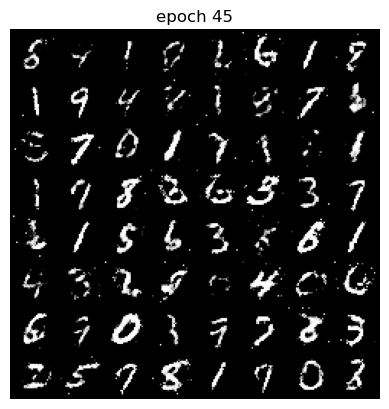

Epoch 45 of 100
Generator loss: 1.16291261, Discriminator loss: 0.92422056


118it [00:15,  7.84it/s]                         


Epoch 46 of 100
Generator loss: 1.01242423, Discriminator loss: 1.11440444


118it [00:13,  9.05it/s]                         


Epoch 47 of 100
Generator loss: 0.82803321, Discriminator loss: 1.11755490


118it [00:12,  9.30it/s]                         


Epoch 48 of 100
Generator loss: 1.30620193, Discriminator loss: 1.08420181


118it [00:12,  9.19it/s]                         


Epoch 49 of 100
Generator loss: 1.05603659, Discriminator loss: 1.04702997


118it [00:12,  9.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


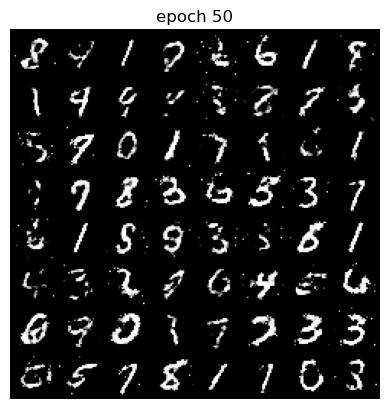

Epoch 50 of 100
Generator loss: 1.08929026, Discriminator loss: 1.04403973


118it [00:12,  9.27it/s]                         


Epoch 51 of 100
Generator loss: 1.26008391, Discriminator loss: 1.11656857


118it [00:12,  9.16it/s]                         


Epoch 52 of 100
Generator loss: 1.30221224, Discriminator loss: 1.05242145


118it [00:13,  9.07it/s]                         


Epoch 53 of 100
Generator loss: 0.97156984, Discriminator loss: 1.24871838


118it [00:12,  9.41it/s]                         


Epoch 54 of 100
Generator loss: 1.14384246, Discriminator loss: 0.92611831


118it [00:13,  9.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


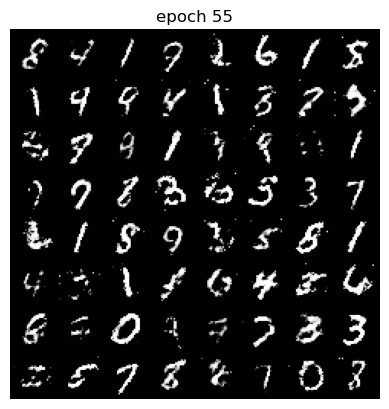

Epoch 55 of 100
Generator loss: 1.08202672, Discriminator loss: 1.08076525


118it [00:12,  9.18it/s]                         


Epoch 56 of 100
Generator loss: 1.03968287, Discriminator loss: 1.18146336


118it [00:12,  9.16it/s]                         


Epoch 57 of 100
Generator loss: 1.00906897, Discriminator loss: 1.08767772


118it [00:12,  9.39it/s]                         


Epoch 58 of 100
Generator loss: 0.84566736, Discriminator loss: 1.28456604


118it [00:12,  9.11it/s]                         


Epoch 59 of 100
Generator loss: 0.95209467, Discriminator loss: 1.11104250


118it [00:12,  9.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


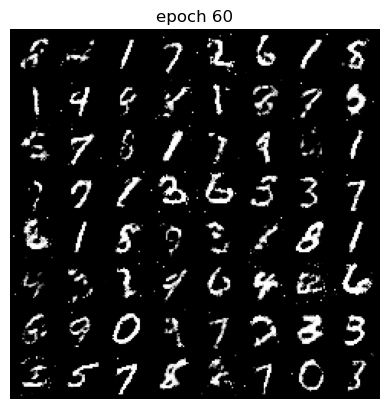

Epoch 60 of 100
Generator loss: 1.02025676, Discriminator loss: 1.12398887


118it [00:11, 10.03it/s]                         


Epoch 61 of 100
Generator loss: 1.15297556, Discriminator loss: 1.04113889


118it [00:09, 12.43it/s]                         


Epoch 62 of 100
Generator loss: 1.08724260, Discriminator loss: 1.10115707


118it [00:09, 11.91it/s]                         


Epoch 63 of 100
Generator loss: 1.13639784, Discriminator loss: 0.99410164


118it [00:09, 12.06it/s]                         


Epoch 64 of 100
Generator loss: 0.93654627, Discriminator loss: 1.18953204


118it [00:09, 12.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


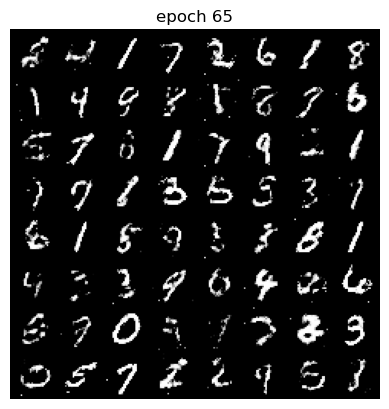

Epoch 65 of 100
Generator loss: 0.86846566, Discriminator loss: 1.02306855


118it [00:09, 12.38it/s]                         


Epoch 66 of 100
Generator loss: 1.11165583, Discriminator loss: 1.09057939


118it [00:09, 12.30it/s]                         


Epoch 67 of 100
Generator loss: 1.21343160, Discriminator loss: 1.14976621


118it [00:09, 12.19it/s]                         


Epoch 68 of 100
Generator loss: 1.06254005, Discriminator loss: 1.13955891


118it [00:09, 12.16it/s]                         


Epoch 69 of 100
Generator loss: 1.56909537, Discriminator loss: 0.97408396


118it [00:09, 12.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


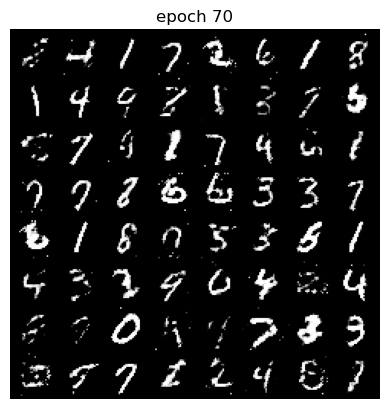

Epoch 70 of 100
Generator loss: 1.24445772, Discriminator loss: 1.03617215


118it [00:09, 11.85it/s]                         


Epoch 71 of 100
Generator loss: 1.22773159, Discriminator loss: 1.06089258


118it [00:09, 12.38it/s]                         


Epoch 72 of 100
Generator loss: 1.12137330, Discriminator loss: 1.14753008


118it [00:09, 12.17it/s]                         


Epoch 73 of 100
Generator loss: 1.16517985, Discriminator loss: 1.05292916


118it [00:09, 12.00it/s]                         


Epoch 74 of 100
Generator loss: 1.04743338, Discriminator loss: 1.07997441


118it [00:09, 12.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


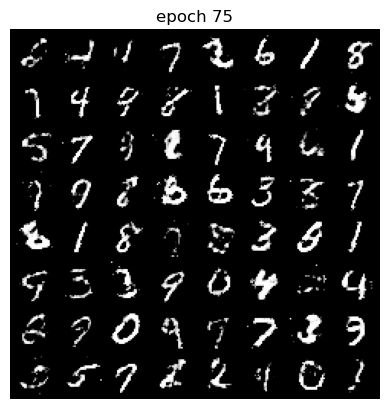

Epoch 75 of 100
Generator loss: 0.87390417, Discriminator loss: 1.21215737


118it [00:09, 12.30it/s]                         


Epoch 76 of 100
Generator loss: 1.08496094, Discriminator loss: 1.17002451


118it [00:09, 12.02it/s]                         


Epoch 77 of 100
Generator loss: 1.23780441, Discriminator loss: 1.10188627


118it [00:09, 12.07it/s]                         


Epoch 78 of 100
Generator loss: 0.91016686, Discriminator loss: 1.19080663


118it [00:09, 12.22it/s]                         


Epoch 79 of 100
Generator loss: 0.95572263, Discriminator loss: 1.08722925


118it [00:09, 12.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


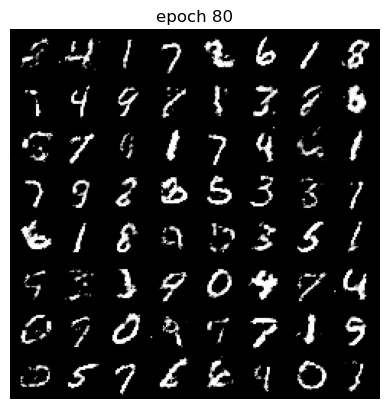

Epoch 80 of 100
Generator loss: 0.77654612, Discriminator loss: 1.19877017


118it [00:09, 12.07it/s]                         


Epoch 81 of 100
Generator loss: 0.98175746, Discriminator loss: 1.14614463


118it [00:09, 12.52it/s]                         


Epoch 82 of 100
Generator loss: 0.92340815, Discriminator loss: 1.13728666


118it [00:09, 12.36it/s]                         


Epoch 83 of 100
Generator loss: 1.07019186, Discriminator loss: 1.16769457


118it [00:09, 12.38it/s]                         


Epoch 84 of 100
Generator loss: 0.99586028, Discriminator loss: 1.04141116


118it [00:09, 12.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


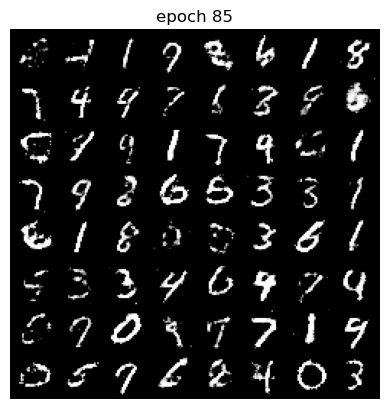

Epoch 85 of 100
Generator loss: 0.96232140, Discriminator loss: 1.22343659


118it [00:10, 11.72it/s]                         


Epoch 86 of 100
Generator loss: 0.96283388, Discriminator loss: 1.06694865


118it [00:10, 11.70it/s]                         


Epoch 87 of 100
Generator loss: 0.91647851, Discriminator loss: 1.03094339


118it [00:09, 12.65it/s]                         


Epoch 88 of 100
Generator loss: 0.83342880, Discriminator loss: 1.18436408


118it [00:09, 12.59it/s]                         


Epoch 89 of 100
Generator loss: 0.93944174, Discriminator loss: 1.19942093


118it [00:09, 12.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


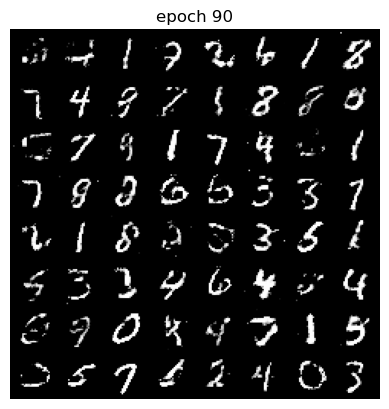

Epoch 90 of 100
Generator loss: 0.90337145, Discriminator loss: 1.11412764


118it [00:09, 12.25it/s]                         


Epoch 91 of 100
Generator loss: 0.92887616, Discriminator loss: 1.00774145


118it [00:09, 12.27it/s]                         


Epoch 92 of 100
Generator loss: 1.06256866, Discriminator loss: 1.08207786


118it [00:09, 11.87it/s]                         


Epoch 93 of 100
Generator loss: 0.84379864, Discriminator loss: 1.20125580


118it [00:09, 12.20it/s]                         


Epoch 94 of 100
Generator loss: 1.01631236, Discriminator loss: 1.20784378


118it [00:09, 12.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


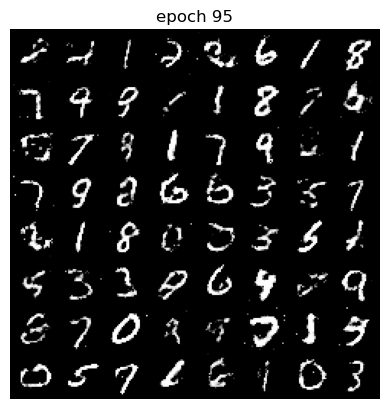

Epoch 95 of 100
Generator loss: 1.04057515, Discriminator loss: 1.15855122


118it [00:09, 12.90it/s]                         


Epoch 96 of 100
Generator loss: 0.86045182, Discriminator loss: 1.14161992


118it [00:08, 13.23it/s]                         


Epoch 97 of 100
Generator loss: 0.98133659, Discriminator loss: 1.18308496


118it [00:09, 13.07it/s]                         


Epoch 98 of 100
Generator loss: 0.91253304, Discriminator loss: 1.14807475


118it [00:08, 13.48it/s]                         


Epoch 99 of 100
Generator loss: 1.04065371, Discriminator loss: 0.99624455


118it [00:08, 13.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


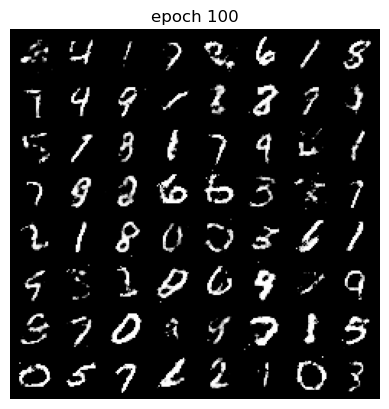

Epoch 100 of 100
Generator loss: 0.83086216, Discriminator loss: 1.27965117


In [14]:
torch.manual_seed(7777)

def generator_loss(fake_output, sample_size):
    ############ YOUR CODE HERE ##########
    loss_g = criterion(fake_output, label_real(sample_size))
    return loss_g
    ######################################
    
def discriminator_loss(fake_output, fake_label, real_output, real_label):
    ############ YOUR CODE HERE ##########

    loss_d = criterion(fake_output, fake_label) + criterion(real_output, real_label)
    return loss_d
    ######################################

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        # get the data
        real, _ = data
        real = real.to(device)
    
        # train the discriminator
        for _ in range(k):
            # generate fake images
            fake = generator(create_noise(sample_size, nz))
            # get the loss for the discriminator
            loss_d = discriminator_loss(discriminator(fake), label_fake(sample_size), discriminator(real), label_real(real.size(0)))
            # optimize the discriminator
            optim_d.zero_grad()
            loss_d.backward()
            optim_d.step()
    
        # train the generator
        for _ in range(j):
            # generate fake images
            fake = generator(create_noise(sample_size, nz))
            # get the loss for the generator
            loss_g = generator_loss(discriminator(fake), sample_size)
            # optimize the generator
            optim_g.zero_grad()
            loss_g.backward()
            optim_g.step()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g # total generator loss for the epoch
    epoch_loss_d = loss_d # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

In [17]:
for i in range(len(losses_g)):
    losses_g[i] = np.array(losses_g[i].cpu().detach().numpy())
    
for i in range(len(losses_d)):
    losses_d[i] = np.array(losses_d[i].cpu().detach().numpy())

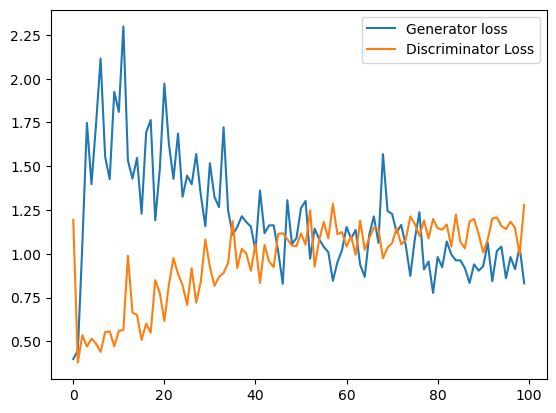

In [18]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')